In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression;
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Obesity prediction.csv")

In [3]:
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
df['Obesity'].value_counts()  # Count occurrences of each class in the target

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: Obesity, dtype: int64

In [6]:
df.isnull().sum()  # Counts the number of missing values per column

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

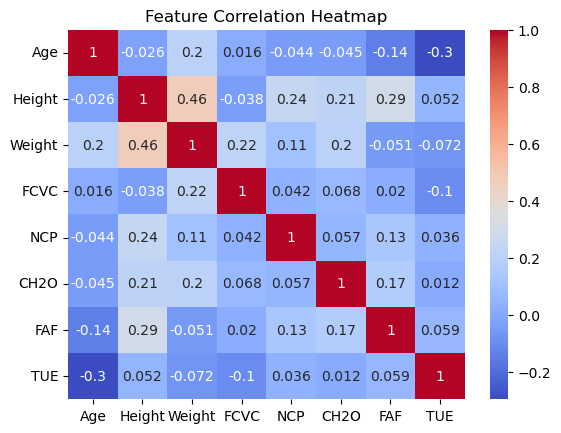

In [7]:
# Correlation Heat Map
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

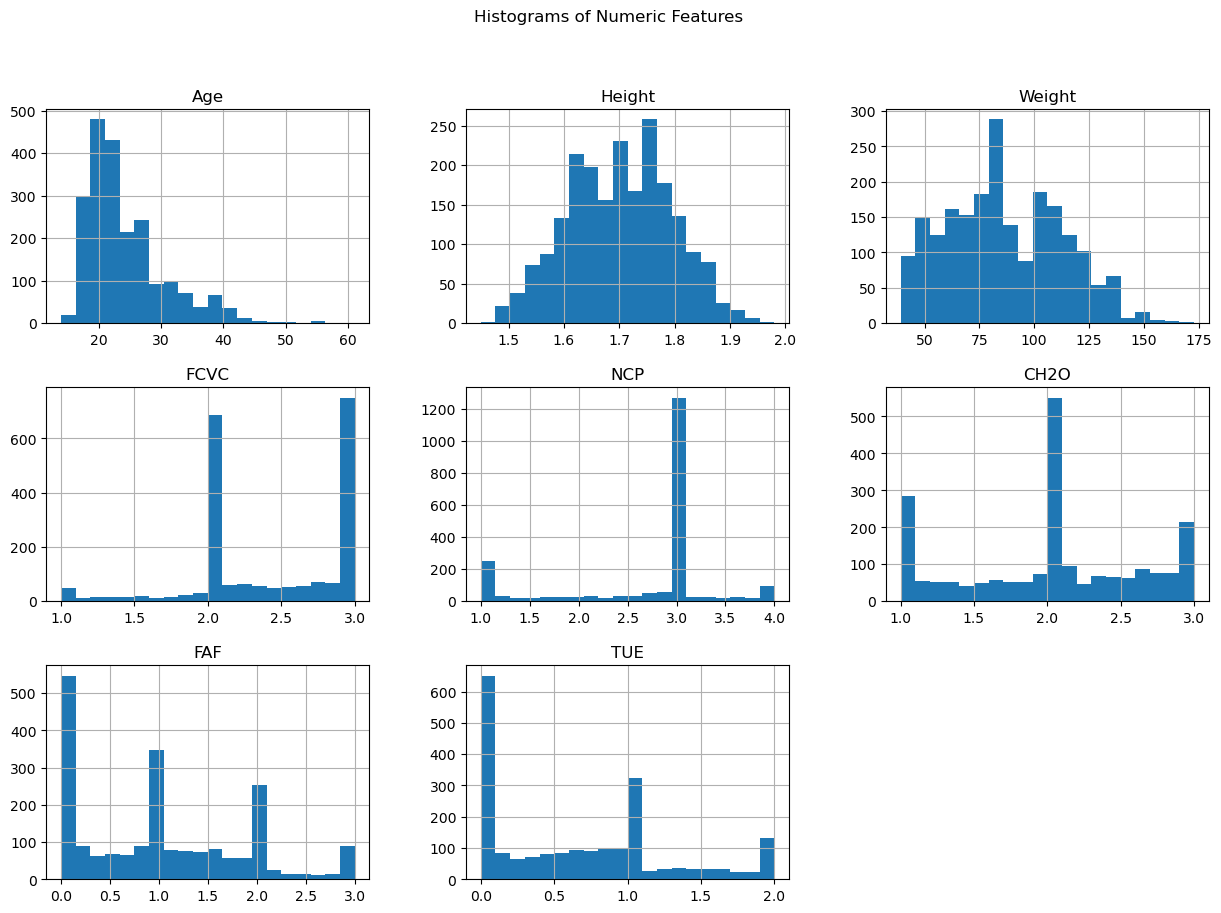

In [8]:
# Histogram
numeric_columns = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
df[numeric_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Numeric Features")
plt.show()
 


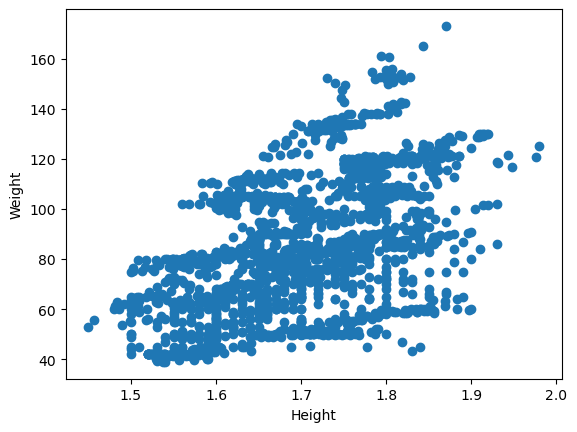

In [9]:
# Scatter Plot
plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()


In [10]:
# Initialize the LabelEncoder instance
le = LabelEncoder()

# Encode the 'Gender' column with numerical values (e.g., Male = 0, Female = 1)
df['Gender'] = le.fit_transform(df['Gender'])

# Encode the 'family_history' column (e.g., Yes = 1, No = 0)
df['family_history'] = le.fit_transform(df['family_history'])

# Encode the 'FAVC' column (e.g., Yes = 1, No = 0)
df['FAVC'] = le.fit_transform(df['FAVC'])

# Encode the 'SMOKE' column (e.g., Yes = 1, No = 0)
df['SMOKE'] = le.fit_transform(df['SMOKE'])

# Encode the 'SCC' column (e.g., Yes = 1, No = 0)
df['SCC'] = le.fit_transform(df['SCC'])


In [11]:
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,Sometimes,0,2.000000,0,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,Sometimes,1,3.000000,1,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,Sometimes,0,2.000000,0,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,Sometimes,0,2.000000,0,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,Sometimes,0,2.000000,0,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,Sometimes,0,1.728139,0,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,Sometimes,0,2.005130,0,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,Sometimes,0,2.054193,0,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,Sometimes,0,2.852339,0,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [12]:
# Convert categorical columns into dummy/indicator variables
df = pd.get_dummies(df, columns=['FAF', 'MTRANS', 'CAEC', 'CALC'], drop_first=True)

In [14]:
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,SMOKE,CH2O,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,0,2.000000,...,0,0,1,0,0,1,0,0,0,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,3.000000,...,0,0,1,0,0,1,0,0,1,0
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,0,2.000000,...,0,0,1,0,0,1,0,1,0,0
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,0,2.000000,...,0,0,0,1,0,1,0,1,0,0
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,0,2.000000,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,0,1.728139,...,0,0,1,0,0,1,0,0,1,0
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,0,2.005130,...,0,0,1,0,0,1,0,0,1,0
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,0,2.054193,...,0,0,1,0,0,1,0,0,1,0
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,0,2.852339,...,0,0,1,0,0,1,0,0,1,0


In [15]:
X = df.drop(columns=['Obesity'])
y = df['Obesity']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')

# Train KNN model
knn_model.fit(X_train, y_train)

# Predict and evaluate KNN
y_pred_knn = knn_model.predict(X_test)
print("KNN Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

KNN Model Performance:
Accuracy: 0.87

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.81      0.99      0.89        86
      Normal_Weight       0.89      0.53      0.66        93
     Obesity_Type_I       0.85      0.91      0.88       102
    Obesity_Type_II       0.94      0.97      0.96        88
   Obesity_Type_III       0.96      1.00      0.98        98
 Overweight_Level_I       0.79      0.88      0.83        88
Overweight_Level_II       0.85      0.81      0.83        79

           accuracy                           0.87       634
          macro avg       0.87      0.87      0.86       634
       weighted avg       0.87      0.87      0.86       634


Confusion Matrix:
[[85  1  0  0  0  0  0]
 [19 49  4  0  0 16  5]
 [ 0  0 93  4  3  1  1]
 [ 0  0  2 85  1  0  0]
 [ 0  0  0  0 98  0  0]
 [ 1  4  1  0  0 77  5]
 [ 0  1  9  1  0  4 64]]


In [18]:
lr_model = LogisticRegression(solver='saga', multi_class='auto', max_iter=3000)

# Train Logistic Regression model
lr_model.fit(X_train, y_train)

# Predict and evaluate LR
y_pred_lr = lr_model.predict(X_test)
print("\nLogistic Regression Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression Model Performance:
Accuracy: 0.79

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.80      0.94      0.87        86
      Normal_Weight       0.79      0.57      0.66        93
     Obesity_Type_I       0.76      0.73      0.74       102
    Obesity_Type_II       0.85      0.99      0.92        88
   Obesity_Type_III       0.94      0.99      0.97        98
 Overweight_Level_I       0.67      0.66      0.67        88
Overweight_Level_II       0.65      0.63      0.64        79

           accuracy                           0.79       634
          macro avg       0.78      0.79      0.78       634
       weighted avg       0.78      0.79      0.78       634


Confusion Matrix:
[[81  5  0  0  0  0  0]
 [20 53  0  0  0 15  5]
 [ 0  1 74 11  5  2  9]
 [ 0  0  1 87  0  0  0]
 [ 0  0  0  1 97  0  0]
 [ 0  8  8  0  1 58 13]
 [ 0  0 15  3  0 11 50]]


c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [19]:
# Instantiate the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Fit the model on training data
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Model Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Gradient Boosting Model Accuracy: 0.93

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.95      0.94        86
      Normal_Weight       0.93      0.84      0.88        93
     Obesity_Type_I       0.96      0.92      0.94       102
    Obesity_Type_II       0.96      0.99      0.97        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.83      0.91      0.87        88
Overweight_Level_II       0.93      0.94      0.93        79

           accuracy                           0.93       634
          macro avg       0.93      0.93      0.93       634
       weighted avg       0.94      0.93      0.93       634

[[82  2  0  0  0  2  0]
 [ 6 78  0  0  0  9  0]
 [ 0  0 94  4  0  3  1]
 [ 0  0  1 87  0  0  0]
 [ 0  1  0  0 97  0  0]
 [ 0  3  0  0  0 80  5]
 [ 0  0  3  0  0  2 74]]


In [20]:
# Instantiate the Gradient Boosting model with specific parameters
gb_model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, random_state=42)

# Fit the model on training data
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Model Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Gradient Boosting Model Accuracy: 0.94

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.94      0.94        86
      Normal_Weight       0.90      0.84      0.87        93
     Obesity_Type_I       0.99      0.94      0.96       102
    Obesity_Type_II       0.95      1.00      0.97        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.85      0.92      0.89        88
Overweight_Level_II       0.95      0.94      0.94        79

           accuracy                           0.94       634
          macro avg       0.94      0.94      0.94       634
       weighted avg       0.94      0.94      0.94       634


Confusion Matrix:
[[81  5  0  0  0  0  0]
 [ 6 78  0  0  0  9  0]
 [ 0  0 96  3  0  3  0]
 [ 0  0  0 88  0  0  0]
 [ 0  0  0  1 97  0  0]
 [ 0  3  0  0  0 81  4]
 [ 0  1  1  1  0  2 74]]


In [21]:
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)  

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy Score: {accuracy:.2f}")
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Random Forest Accuracy Score: 0.91

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.93      0.94        86
      Normal_Weight       0.72      0.88      0.79        93
     Obesity_Type_I       0.96      0.89      0.92       102
    Obesity_Type_II       0.97      0.99      0.98        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.89      0.81      0.85        88
Overweight_Level_II       0.92      0.85      0.88        79

           accuracy                           0.91       634
          macro avg       0.91      0.91      0.91       634
       weighted avg       0.91      0.91      0.91       634

[[80  6  0  0  0  0  0]
 [ 5 82  0  0  0  5  1]
 [ 0  4 91  3  0  1  3]
 [ 0  0  1 87  0  0  0]
 [ 0  1  0  0 97  0  0]
 [ 0 15  0  0  0 71  2]
 [ 0  6  3  0  0  3 67]]


In [22]:
# Train and Evaluate Default Decision Tree Model
default_dt_model = DecisionTreeClassifier(random_state=42)
default_dt_model.fit(X_train, y_train)
default_y_pred = default_dt_model.predict(X_test)

default_accuracy = accuracy_score(y_test, default_y_pred)
print(f"Default Decision Tree Model Accuracy: {default_accuracy:.2f}")
print("\nDefault Classification Report:")
print(classification_report(y_test, default_y_pred))
print("\nDefault Confusion Matrix:")
print(confusion_matrix(y_test, default_y_pred))

# Optimize the Model Using GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],  # No limit, or limit to certain depth
    'min_samples_split': [2, 5, 10],  # Minimum samples for splitting nodes
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at leaf nodes
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider
    'criterion': ['gini', 'entropy'],  # Split quality measure
}

# Initialize GridSearchCV with cross-validation
dt_model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the Optimized Model
optimized_y_pred = best_model.predict(X_test)
optimized_accuracy = accuracy_score(y_test, optimized_y_pred)

print("\nOptimized Decision Tree Model Accuracy:")
print(f"Accuracy: {optimized_accuracy:.2f}")
print("\nOptimized Classification Report:")
print(classification_report(y_test, optimized_y_pred))
print("\nOptimized Confusion Matrix:")
print(confusion_matrix(y_test, optimized_y_pred))

# Display Best Hyperparameters
print("\nBest Hyperparameters Found by GridSearchCV:")
print(best_params)


Default Decision Tree Model Accuracy: 0.90

Default Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.93      0.91        86
      Normal_Weight       0.80      0.80      0.80        93
     Obesity_Type_I       0.97      0.89      0.93       102
    Obesity_Type_II       0.94      0.97      0.96        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.85      0.81      0.83        88
Overweight_Level_II       0.86      0.95      0.90        79

           accuracy                           0.90       634
          macro avg       0.90      0.90      0.90       634
       weighted avg       0.90      0.90      0.90       634


Default Confusion Matrix:
[[80  6  0  0  0  0  0]
 [10 74  0  0  0  9  0]
 [ 0  1 91  4  0  0  6]
 [ 0  0  3 85  0  0  0]
 [ 0  0  0  1 97  0  0]
 [ 0 11  0  0  0 71  6]
 [ 0  0  0  0  0  4 75]]
Fitting 5 folds for each of 216 candidates, totalling 1

In [23]:
dt_model = DecisionTreeClassifier(criterion= 'entropy', min_samples_leaf= 1, min_samples_split= 2, random_state=42)

# Fit the model on training data
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Model Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Decision Tree Model Accuracy: 0.94

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.98      0.95        86
      Normal_Weight       0.96      0.78      0.86        93
     Obesity_Type_I       0.95      0.94      0.95       102
    Obesity_Type_II       0.93      0.95      0.94        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.86      0.97      0.91        88
Overweight_Level_II       0.94      0.95      0.94        79

           accuracy                           0.94       634
          macro avg       0.94      0.94      0.94       634
       weighted avg       0.94      0.94      0.94       634

[[84  2  0  0  0  0  0]
 [ 7 73  0  0  0 11  2]
 [ 0  0 96  5  0  0  1]
 [ 0  0  4 84  0  0  0]
 [ 0  0  0  1 97  0  0]
 [ 0  1  0  0  0 85  2]
 [ 0  0  1  0  0  3 75]]
